# Applying Naive-Bayes Classification algorithms (Gaussian,Multinomial) on PIMA dataset from UCI ML library

In [109]:
pwd

'/Users/Radhika/Desktop/MSU-MSBA/CSE891_2 Air_Quality_Project'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from random import sample
from sklearn.cross_validation import train_test_split

#importing libraries 

url="https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
pima=requests.get(url).content
pima=pd.read_csv(io.StringIO(pima.decode('utf-8')),sep=',')

#loading data from UCI portal

/Users/Radhika/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#renaming columns
pima.columns = ['No_Of_Times_Pregnent', 'Plasma_Glucose_Conc','Tristolic_Blood_Pressure','Tricepts_Skin_Fold','2_hr_Serum_Insulin','BMI','Diabetes_Pedigree_fn','Age','Target']

In [5]:
pima.head()

,No_Of_Times_Pregnent,Plasma_Glucose_Conc,Tristolic_Blood_Pressure,Tricepts_Skin_Fold,2_hr_Serum_Insulin,BMI,Diabetes_Pedigree_fn,Age,Target
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


No_Of_Times_Pregnent          3.842243
Plasma_Glucose_Conc         120.859192
Tristolic_Blood_Pressure     69.101695
Tricepts_Skin_Fold           20.517601
2_hr_Serum_Insulin           79.903520
BMI                          31.990482
Diabetes_Pedigree_fn          0.471674
Age                          33.219035
Target                        0.348110
dtype: float64

No_Of_Times_Pregnent          3.368678
Plasma_Glucose_Conc          31.957615
Tristolic_Blood_Pressure     19.355525
Tricepts_Skin_Fold           15.943655
2_hr_Serum_Insulin          115.207929
BMI                           7.883946
Diabetes_Pedigree_fn          0.331281
Age                          11.744632
Target                        0.476371
dtype: float64

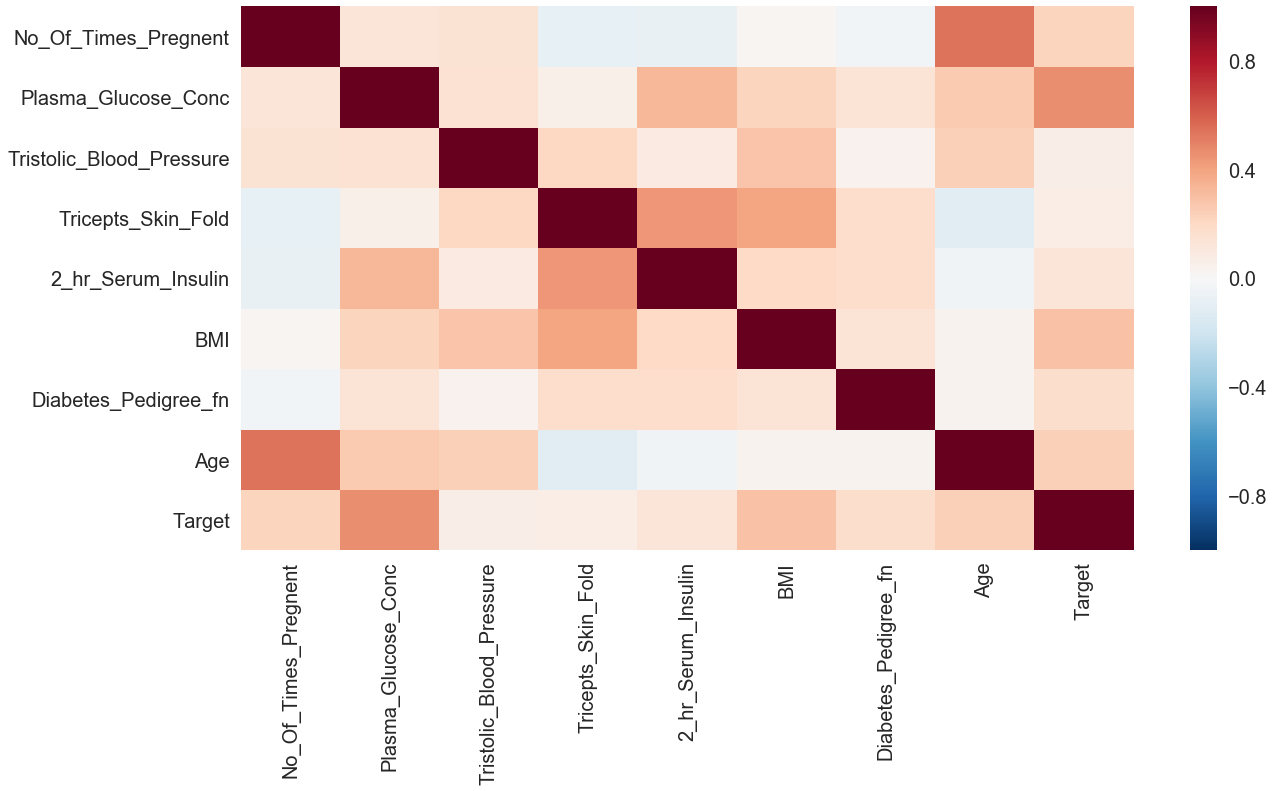

In [5]:
import seaborn as sns
sns.set_style("dark")
sns.set_context("poster")
pima.apply(np.mean)
pima.apply(np.std)
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
corr_matrix = pima.corr()
sns.heatmap(corr_matrix, vmax=1.).xaxis.tick_bottom()

Few of the Interesting observatins are:
    *BMI is highly correlated to Triceps_Skin_Fold
    *2_hr_Serum_Insulin is Highly correlated with Triceps_Skin_fold
    *Plasma_Glusoce_Conc is correlated with Target 
    *Target is has correlation with BMI
    *Age is highly correlated to No_Of_Times_Pregnent

In [6]:
#Separating Features from Target

Y = pima.Target
X = pima.drop('Target',axis=1)

In [18]:
#converting data to array for computaional needs

from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import confusion_matrix
x = np.array(X)
y = np.array(Y)

### Though I know that Gaussian NB works best on Normalized data, still applying it on non-normalized data to check the Accuracy %


In [8]:
#Initiating Naive-Bayes Gaussian Classifier
gnb = GaussianNB()

In [9]:
#Predicting on data
y_pred = gnb.fit(x,y).predict(x)

In [10]:
#Checking Results of Classifiation
print("Number of mislabeled points out of a total %d points using Naive-Bayes GaussianNB: %d"
      % (x.shape[0],(y != y_pred).sum()))

Number of mislabeled points out of a total 767 points using Naive-Bayes GaussianNB: 182


In [11]:
#Accuracy
print("Prediction Accuracy Naive-Bayes GaussianNB is : %f" 
     % (1 -((y != y_pred).sum()/x.shape[0])))

Prediction Accuracy Naive-Bayes GaussianNB is : 0.762712


In [12]:
#Confusion Matrix
cnf_matrix_gnb = confusion_matrix(y, y_pred)

In [13]:
print(cnf_matrix_gnb)

[[422  78]
 [104 163]]


In [33]:
# Slicing the confusion matrix value for better interpretation.  
confusion = metrics.confusion_matrix(y, y_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [28]:
#Classification Accuracy
print((TP+TN)/ float(TP+TN+FP+FN))
print(metrics.accuracy_score(y, y_pred))

0.762711864407
0.762711864407


In [29]:
#Miss-Classification Rate or #Classification Error
print((FP+FN)/float(TP+TN+FP+FN))
print(1 - (metrics.accuracy_score(y, y_pred)))

0.237288135593
0.237288135593


In [30]:
#Sensitivity /TP Rate/ Recall -- How senstive is the classfier predicting positive instances
print( TP/float(TP+FN))
print(metrics.recall_score(y, y_pred))

0.610486891386
0.610486891386


In [31]:
#Specificity -- How specific/selective is model in predicting negative instances
print( TN/float(TN+FP))

0.844


In [20]:
#Loading libraries for Naive-Bayes Multinomial
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [21]:
#Creating test & train dataframes for Features and Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(536, 8) (536,)
(231, 8) (231,)


### Multinomial Naive-Bayes Classfier ideally works best on discrete counts data, however applying it to experiment the result.

In [22]:
#Initiating Multinomial Naive-Bayes Classifier
mnb = MultinomialNB()

In [23]:
#Predicting o Test dataset
y_pred_mnb = mnb.fit(x_train, y_train).predict(x_test)

In [24]:
#Accuracy
print("Number of mislabeled points out of a total %d points using Naive-Bayes MultinomialNB: %d"
      % (x.shape[0],(y_test != y_pred_mnb).sum()))

Number of mislabeled points out of a total 767 points using Naive-Bayes MultinomialNB: 95


In [25]:
print("Prediction Accuracy using Naive-Bayes MultinomialNB is : %f" 
     % (1 -((y_test != y_pred_mnb).sum()/x.shape[0])))

Prediction Accuracy using Naive-Bayes MultinomialNB is : 0.876141


In [26]:
#Confusion Matrix
cnf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)

In [27]:
from sklearn import metrics
print(cnf_matrix_mnb)

[[95 58]
 [37 41]]


/Users/Radhika/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


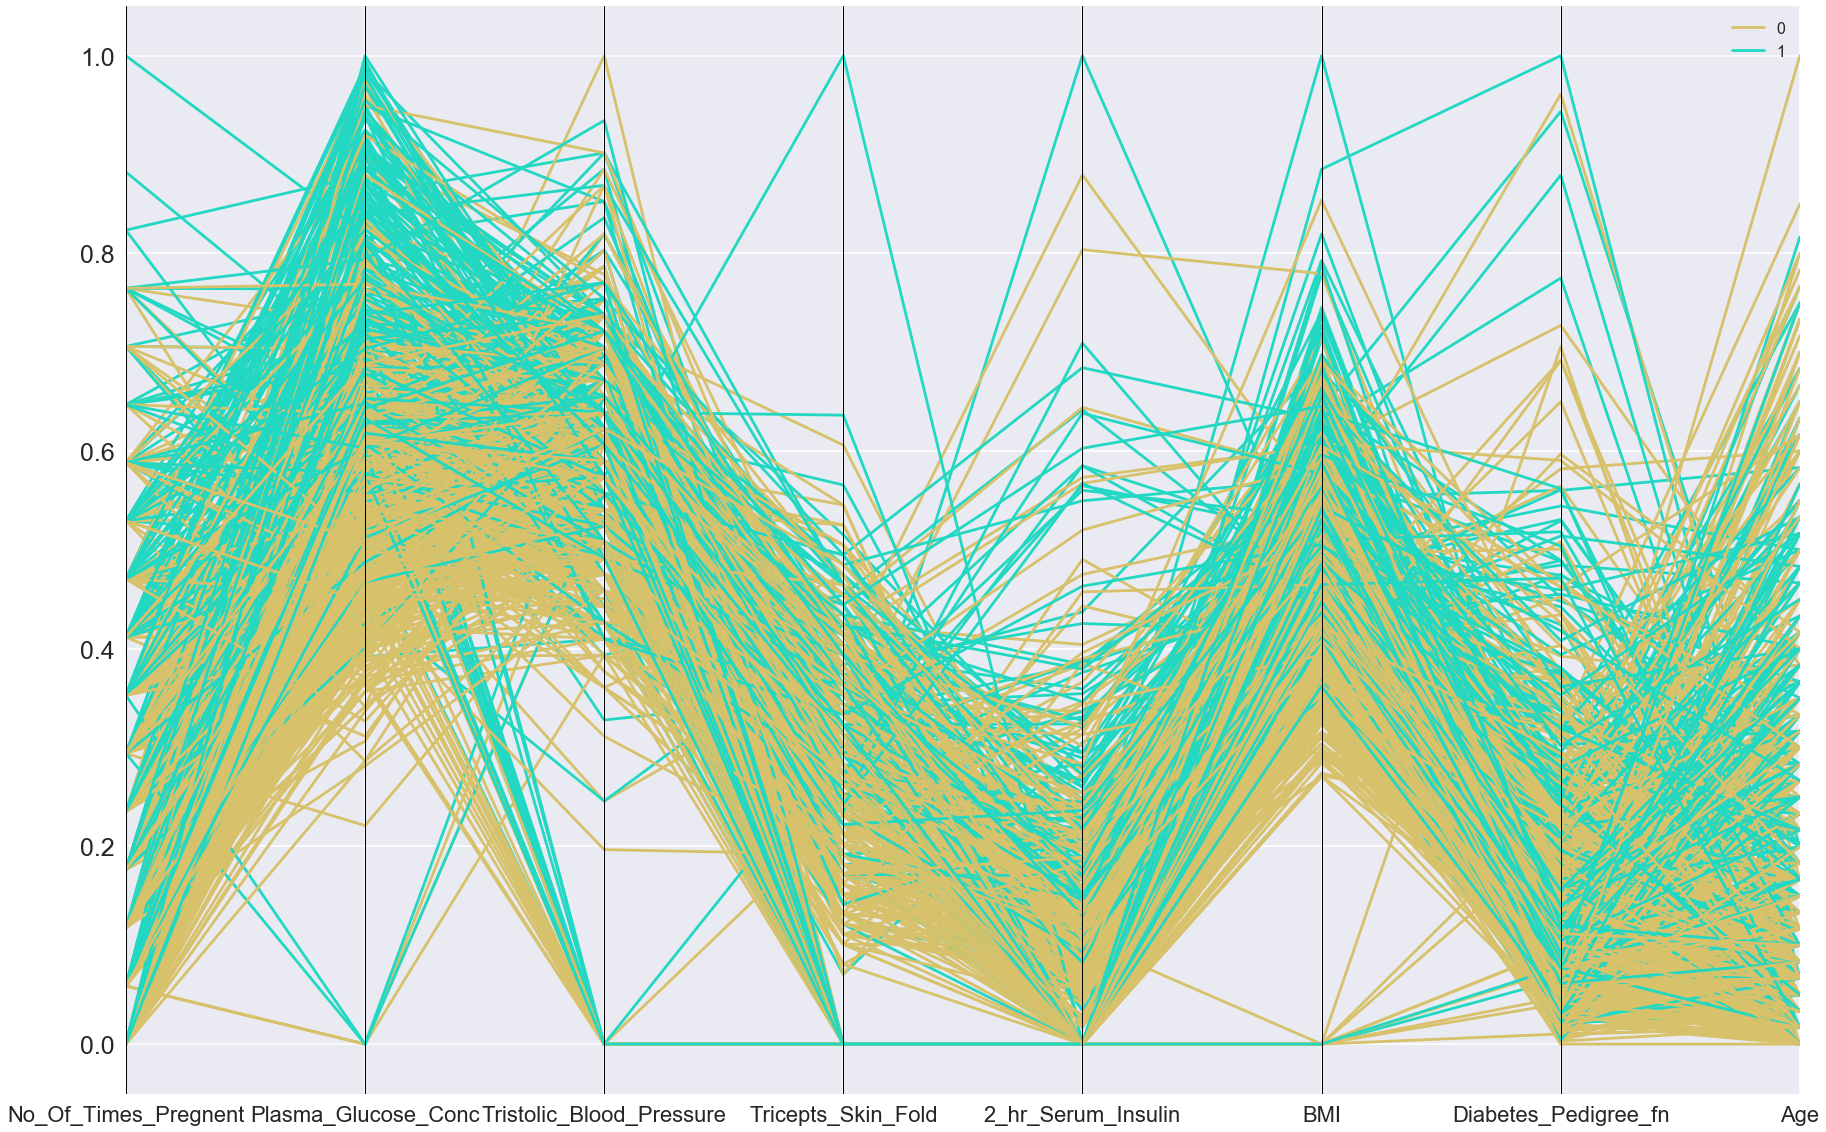

In [60]:
#Normalizing Data to create Parallel Coordinated plot to Vizualize the main features participating towards target
from pandas.tools.plotting import parallel_coordinates

plt.figure(figsize=(30,20))
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=25) 

Features = ['No_Of_Times_Pregnent', 'Plasma_Glucose_Conc','Tristolic_Blood_Pressure', 'Tricepts_Skin_Fold', '2_hr_Serum_Insulin','BMI', 'Diabetes_Pedigree_fn', 'Age']

X_norm = (X - X.min())/(X.max() - X.min())

data_norm = pd.concat([X_norm[Features], Y], axis=1)

parallel_coordinates(data_norm, 'Target')
plt.show()

Parallel coordinated plot above uncovers that the higher value for Plasma_Glucose_Conc,Tristolic_Blood_Pressure & BMI lead to Diabetes.
Other correlated features which earlier seemed significant as Age & Triceps_Skin_Fold do not consistantly conribute towards diabetes.


In [51]:
#Splitting Normalized data in test & train
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(536, 8) (536,)
(231, 8) (231,)


## Applying Gaussian NB on Normalized data gives best overall accuracy.

In [29]:
gnb_normalized = GaussianNB()

In [30]:
y_pred_gnb_norm = gnb_normalized.fit(x_train, y_train).predict(x_test)


In [31]:
print("Number of mislabeled points out of a total %d points using Naive-Bayes GaussianNB: %d"
      % (x_train.shape[0],(y_test != y_pred_gnb_norm).sum()))

Number of mislabeled points out of a total 536 points using Naive-Bayes GaussianNB: 59


In [189]:
#Accuracy
print("Prediction Accuracy Naive-Bayes GaussianNB is : %f" 
     % (1 -((y_test != y_pred_gnb_norm).sum()/y_train.shape[0])))

Prediction Accuracy Naive-Bayes GaussianNB is : 0.811567


Best accuracy prediction is achieved by Gaussian NB on Normalized data.

In [34]:
confusion = metrics.confusion_matrix(y_test, y_pred_gnb_norm)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [35]:
#Classification Accuracy
print((TP+TN)/ float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred_gnb_norm))

0.744588744589
0.744588744589


In [37]:
#Missclassification Rate
print((FP+FN)/float(TP+TN+FP+FN))
print(1 - (metrics.accuracy_score(y_test, y_pred_gnb_norm)))

0.255411255411
0.255411255411


In [38]:
#Sensitivity /TP Rate/ Recall -- How senstive is the classfier predicting positive instances
print( TP/float(TP+FN))
print(metrics.recall_score(y_test, y_pred_gnb_norm))

0.551282051282
0.551282051282


In [39]:
#Specificity -- How specific/selective is model in predicting negative instances
print( TN/float(TN+FP))

0.843137254902


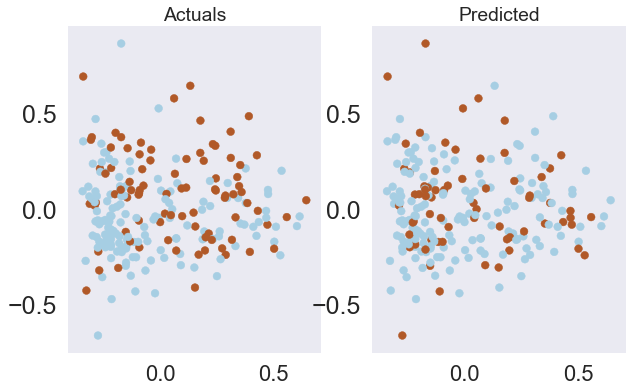

In [69]:
#Plotting test actuals and predicted for comparison
from sklearn.decomposition import PCA
x_pca = PCA(2).fit_transform(x_test)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].scatter(x_pca[:,0], x_pca[:,1], c=y_test, s=60, cmap=plt.cm.Paired)
ax[0].set_title('Actuals') 
ax[1].scatter(x_pca[:,0], x_pca[:,1], c=y_pred_gnb_norm, s=60, cmap=plt.cm.Paired)
ax[1].set_title('Predicted') 
plt.show()

## Applying Knn on PIMA dataset

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
import numpy as np

In [190]:
pima_knn_5 = KNeighborsClassifier(n_neighbors = 5).fit(x_train,y_train)

In [191]:
print("Training Cross-validation score for Knn = 5 : %f" 
     %(pima_knn_5.score(x_train,y_train)))

Training Cross-validation score for Knn = 5 : 0.826493


In [192]:
print("Test Cross-validation score for Knn = 5 : %f" 
     % (pima_knn_5.score(x_test, y_test)))

Test Cross-validation score for Knn = 5 : 0.731602


In [193]:
knn = KNeighborsRegressor(n_neighbors=3)

In [194]:
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [195]:
prediction_knn = knn.predict(x_test)

In [124]:
actual = y_test

In [196]:
mse = (((prediction_knn - actual) ** 2).sum())/len(prediction_knn)

In [197]:
mse

0.20105820105820119

In [199]:
print("Prediction Accuracy using using KNN = 3 is : %f" 
     % (1 -((y_test != prediction_knn).sum()/y_train.shape[0])))

Prediction Accuracy using using KNN = 3 is : 0.744403


## Applying Logistic Regression & checking classification accuracy

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
logreg = LogisticRegression()

In [203]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [204]:
y_pred_class_logreg = logreg.predict(x_test)

In [205]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class_logreg))

0.748917748918


Compairing against the most prominent prediction (if done random) or DUMB Model

In [206]:
y_test.value_counts()

0    145
1     86
Name: Target, dtype: int64

In [207]:
y_test.mean()

0.3722943722943723

In [208]:
1 - y_test.mean()

0.6277056277056277

In [209]:
#compairing classification accuracy when problem is binary
max(y_test.mean(), 1- y_test.mean())

0.6277056277056277

In [210]:
# to test the classification accuracy with null accuracy
y_test.value_counts().head(1)/ len(y_test)

0    0.627706
Name: Target, dtype: float64

In [211]:
#compairing the pattern of predictictions vs test 
print('T:', y_test.values[0:30])
print('F:', y_pred_class_logreg[0:30])

T: [1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
F: [0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [212]:
#using the confusion matrix to check type of error the model if tilting to
print(metrics.confusion_matrix(y_test,y_pred_class_logreg))

[[131  14]
 [ 44  42]]


In [213]:
confusion = metrics.confusion_matrix(y_test, y_pred_class_logreg)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]


In [214]:
#Classification Accuracy
print((TP+TN)/ float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test,y_pred_class_logreg))

0.748917748918
0.748917748918


In [215]:
#Miss-Classification Rate or #Classification Error
print((FP+FN)/float(TP+TN+FP+FN))
print(1 - (metrics.accuracy_score(y_test,y_pred_class_logreg)))

0.251082251082
0.251082251082


In [216]:
#Sensitivity /TP Rate/ Recall -- How senstive is the classfier predicting positive instances
print( TP/float(TP+FN))
print(metrics.recall_score(y_test,y_pred_class_logreg))

0.488372093023
0.488372093023


In [217]:
#Specificity -- How specific/selective is model in predicting negative instances
print( TN/float(TN+FP))

0.903448275862


In [218]:
#False Positive Rate -- When value is negative how often is the result corret
print( FP/float(TN+FP))

0.0965517241379


In [219]:
#Precision -- when positive value is predicted, how often is it correct
print (TP/float(TP+FP))
print(metrics.precision_score(y_test,y_pred_class_logreg))


0.75
0.75


In [220]:
#further evaluation of model
logreg.predict_proba(x_test)[0:20,:]

array([[ 0.60326333,  0.39673667],
       [ 0.76498231,  0.23501769],
       [ 0.36820134,  0.63179866],
       [ 0.45466333,  0.54533667],
       [ 0.82113461,  0.17886539],
       [ 0.57528573,  0.42471427],
       [ 0.68016267,  0.31983733],
       [ 0.50227179,  0.49772821],
       [ 0.77187853,  0.22812147],
       [ 0.1895312 ,  0.8104688 ],
       [ 0.5620499 ,  0.4379501 ],
       [ 0.41117817,  0.58882183],
       [ 0.86539982,  0.13460018],
       [ 0.69381388,  0.30618612],
       [ 0.65592374,  0.34407626],
       [ 0.70087122,  0.29912878],
       [ 0.6945844 ,  0.3054156 ],
       [ 0.6980413 ,  0.3019587 ],
       [ 0.39640532,  0.60359468],
       [ 0.71890755,  0.28109245]])

In [221]:
logreg.predict_proba(x_test)[0:20,1]

array([ 0.39673667,  0.23501769,  0.63179866,  0.54533667,  0.17886539,
        0.42471427,  0.31983733,  0.49772821,  0.22812147,  0.8104688 ,
        0.4379501 ,  0.58882183,  0.13460018,  0.30618612,  0.34407626,
        0.29912878,  0.3054156 ,  0.3019587 ,  0.60359468,  0.28109245])

In [222]:
y_pred_prob_1 = logreg.predict_proba(x_test)[:,1]

In [223]:
len(y_pred_prob_1)

231

(array([ 17.,  42.,  50.,  35.,  20.,  28.,  19.,  10.,   6.,   4.]),
 array([ 0.06568531,  0.1470802 ,  0.2284751 ,  0.30986999,  0.39126488,
         0.47265977,  0.55405466,  0.63544956,  0.71684445,  0.79823934,
         0.87963423]),
 <a list of 10 Patch objects>)

(0, 1)

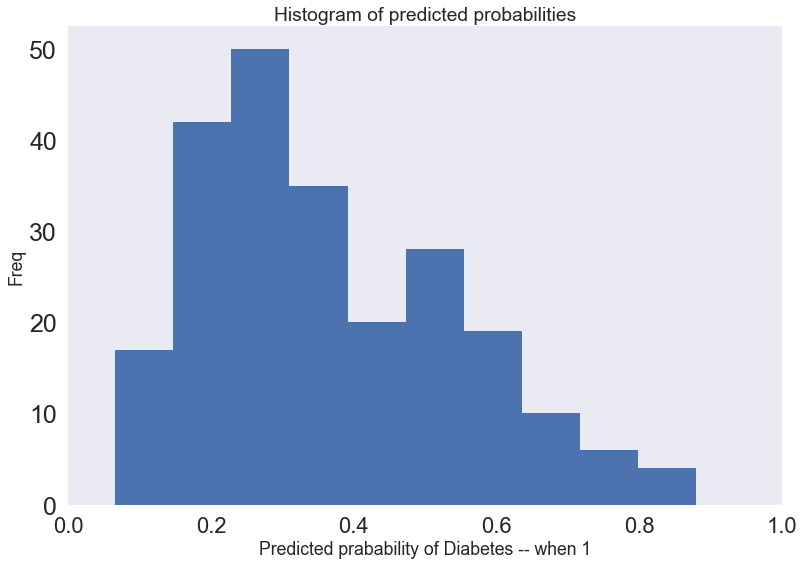

In [224]:
plt.hist(y_pred_prob_1,bins=10)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted prabability of Diabetes -- when 1')
plt.ylabel('Freq')


In [225]:
#lowering prediction probability of the prediction from 0.51 to 0.41
#hence predict as diabetes if the predicted proabability is > 0.41

from sklearn.preprocessing import binarize
y_pred_class_altered = binarize(y_pred_prob_1, 0.4)[0]

/Users/Radhika/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [226]:
y_pred_prob_1[0:10]

array([ 0.39673667,  0.23501769,  0.63179866,  0.54533667,  0.17886539,
        0.42471427,  0.31983733,  0.49772821,  0.22812147,  0.8104688 ])

In [227]:
y_pred_class_logreg[0:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

## compairing old confusion matrix with new changed predicted probability confusion matrix

In [228]:
print(confusion)

[[131  14]
 [ 44  42]]


In [229]:
print( metrics.confusion_matrix(y_test,y_pred_class_altered))

[[115  30]
 [ 33  53]]


In [230]:
#new Sensitivity
print( 65/float(65+18))
#new Specificity
print((97)/float(97+51))

0.7831325301204819
0.6554054054054054


(0.0, 1.0)

(0.0, 1.0)

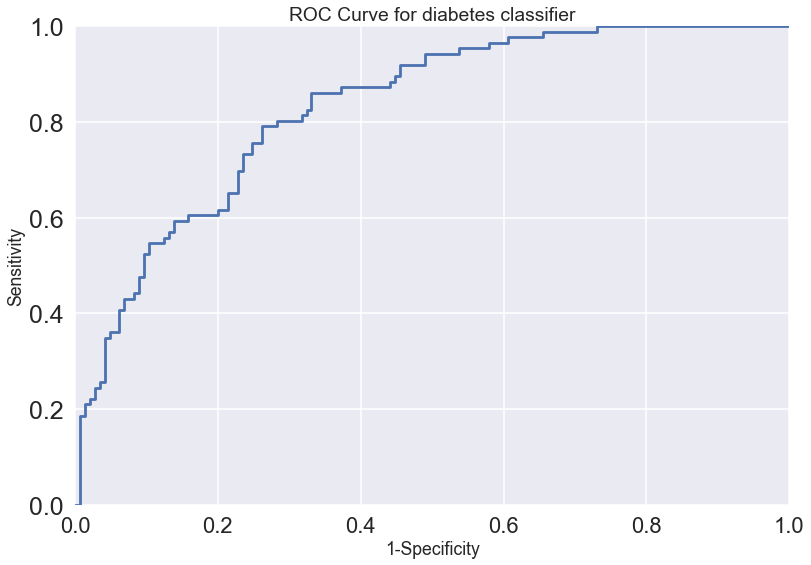

In [231]:
#plotting ROC curve
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_1)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC Curve for diabetes classifier")
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.grid(True)

### Applying Support Vector Machine (SVM)

In [71]:
from sklearn import metrics
from sklearn.svm import SVC

In [73]:
svm_pima = SVC()

In [74]:
svm_pima.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
svm_pred = svm_pima.predict(x_test)

In [78]:
print("Prediction Accuracy for Support Vector Machine is : %f" 
     % (metrics.accuracy_score(y_test,svm_pred)))

Prediction Accuracy for Support Vector Machine is : 0.766234


In [82]:
print(metrics.confusion_matrix(y_test,svm_pred))

[[136   9]
 [ 45  41]]


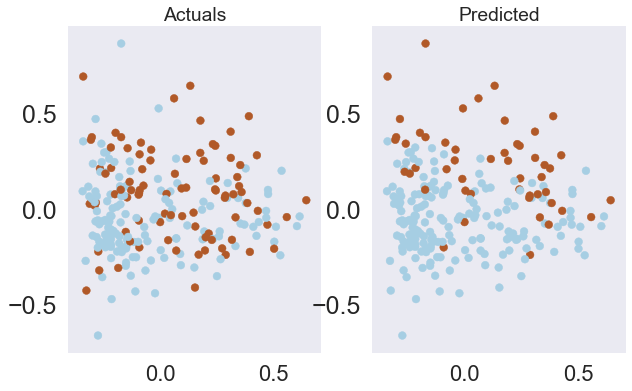

In [83]:
from sklearn.decomposition import PCA
x_pca = PCA(2).fit_transform(x_test)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].scatter(x_pca[:,0], x_pca[:,1], c=y_test, s=60, cmap=plt.cm.Paired)
ax[0].set_title('Actuals') 
ax[1].scatter(x_pca[:,0], x_pca[:,1], c=svm_pred, s=60, cmap=plt.cm.Paired)
ax[1].set_title('Predicted') 
plt.show()

In [86]:
from sklearn.ensemble import BaggingClassifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier
m = KNeighborsClassifier(n_neighbors =3)

In [133]:
bag = BaggingClassifier(
m, max_samples = .5, max_features=2,n_jobs=2,oob_score=True)

In [134]:
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=2,
         max_samples=0.5, n_estimators=10, n_jobs=2, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [135]:
bag.oob_score_

0.69776119402985071

In [138]:
bag.score(x_test,y_test)

0.67099567099567103

### bagging classifier is not really performing well with meta estimator as KNearest Neighbor.


In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
m = RandomForestClassifier(n_estimators=20, oob_score=True,warm_start=True)

In [142]:
m.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=True)

In [144]:
m.score(x_test,y_test)

0.73160173160173159

### getting slighty better accuracy using RandonForestClassifier

In [146]:
from sklearn.ensemble import AdaBoostClassifier

In [149]:
m = AdaBoostClassifier(base_estimator=None,n_estimators=100)

In [150]:
m.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [151]:
m.score(x_test,y_test)

0.75324675324675328

### AdaBoostClassifier maxes out at 75% acuracy too

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
m = GradientBoostingClassifier(n_estimators=10)

In [173]:
m.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=20, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [172]:
m.score(x_test,y_test)

0.74891774891774887

### same for #GradientBoositng

In [171]:
m.set_params(n_estimators=20, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=20, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [177]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [181]:
m = VotingClassifier(
estimators = [('lr', LogisticRegression()),
              ('rf', RandomForestClassifier()),
              ('gnb',GaussianNB())], voting = 'hard')

In [182]:
m.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...lse, random_state=None,
            verbose=0, warm_start=False)), ('gnb', GaussianNB(priors=None))],
         n_jobs=1, voting='hard', weights=None)

In [183]:
m.score(x_test,y_test)

0.74458874458874458

Applying all the ensemble techniques also gives the best accuracy score of 74%, while Gaussian NB on normalized data provides the best accuracy.
Hence, Knowing your data and hoosing correct algorithm is the best practice.

Also, it is noteworthy to see that by population of data 64% people do not have diabetes, Thus if we predict that everyone will not have diabetes, we would still be correct 64% of times.
In such a case the Lift obtained by using any technique is a very important insight.
Thus, 74% or 80% prediction is not very high in numbers but it predicts in both outcomes 0/1.
In such a problem it becomes key as to which type of prediction is most valuable or what is the question asked by business to solve the question.
